In [20]:
# First read the csv file containing the wrangled data
import pandas as pd
df=pd.read_csv('wrangled_data.csv')
df = df.rename(columns={'less_than_high_school_percentage_adults_only':'less_than_high_school_diploma',
                                  'high_school_diploma_percentage_adults_only':'high_school_diploma',
                                  'some_college_or_associate_degree_percentage':'some_college_or_associate_degree',
                                 'bachelors_or_higher_percentage':'bachelors_or_higher'})
df.head()

,state,county,rural_urban_continuum_code,less_than_high_school_diploma,high_school_diploma,some_college_or_associate_degree,bachelors_or_higher,poverty_percentage,population_estimate,unemployment_rate
0,AL,Autauga County,2.0,12.417,34.331,28.660,24.593,14.0,55416,5.3
1,AL,Baldwin County,3.0,9.972,28.692,31.788,29.547,12.0,208563,5.4
2,AL,Barbour County,6.0,26.236,34.927,25.969,12.868,30.0,25965,8.6
3,AL,Bibb County,1.0,19.302,41.816,26.883,12.000,20.0,22643,6.6
4,AL,Blount County,1.0,19.969,32.942,34.039,13.050,14.0,57704,5.5


In [21]:
# Add two new columns to the DataFrame which show the percentage of people with diploma degree or lower and percentage of people
# with some degree more than diploma.
df_extended = df.copy()
df_extended['high_school_diploma_or_less']=df_extended.iloc[:,3]+df_extended.iloc[:,4]
df_extended['more_than_high_school_diploma']=df_extended.iloc[:,5]+df_extended.iloc[:,6]
df_temp = df_extended.iloc[:,[0,1,-5,-2,-1]]
df_temp.head()

,state,county,poverty_percentage,high_school_diploma_or_less,more_than_high_school_diploma
0,AL,Autauga County,14.0,46.748,53.253
1,AL,Baldwin County,12.0,38.664,61.335
2,AL,Barbour County,30.0,61.163,38.837
3,AL,Bibb County,20.0,61.118,38.883
4,AL,Blount County,14.0,52.911,47.089


In [22]:
# Create a new data frame by melting the new data frame (with two education level) based on education level
new_df1 = pd.melt(df_temp,id_vars=['state','county','poverty_percentage'],var_name='education_level',value_name='education_percentage')
new_df1.head()

,state,county,poverty_percentage,education_level,education_percentage
0,AL,Autauga County,14.0,high_school_diploma_or_less,46.748
1,AL,Baldwin County,12.0,high_school_diploma_or_less,38.664
2,AL,Barbour County,30.0,high_school_diploma_or_less,61.163
3,AL,Bibb County,20.0,high_school_diploma_or_less,61.118
4,AL,Blount County,14.0,high_school_diploma_or_less,52.911


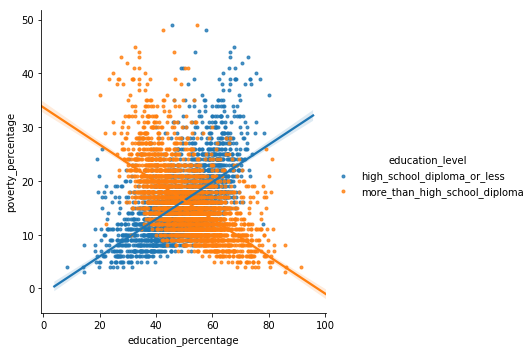

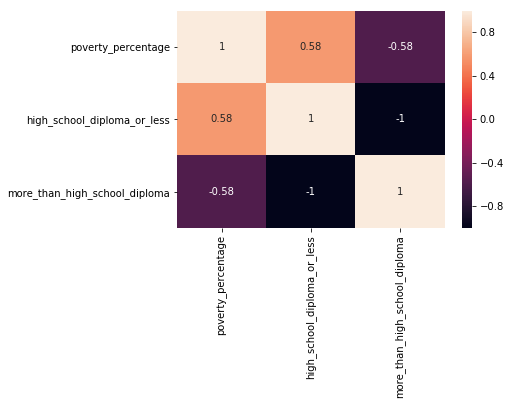

In [31]:
# The first plot shows how the poverty percentage varies based on the two education level
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot(x='education_percentage',y='poverty_percentage',hue='education_level',data=new_df1,markers='.')
plt.show()
# The second plot shows the heat map
correlation_df1=df_extended.loc[:,['poverty_percentage','high_school_diploma_or_less','more_than_high_school_diploma']].corr()
sns.heatmap(correlation_df1,annot=True)
plt.show()

## Conclusion 1: Higher education reduces poverty level

In [24]:
# Then melt the extended dataframe (with more educational levels) on the education level
df_temp = df_extended.iloc[:,[0,1,3,4,5,6,7]]
new_df2 = pd.melt(df_temp, id_vars=['state','county','poverty_percentage'],
                  var_name='education_level',value_name='education_percentage')

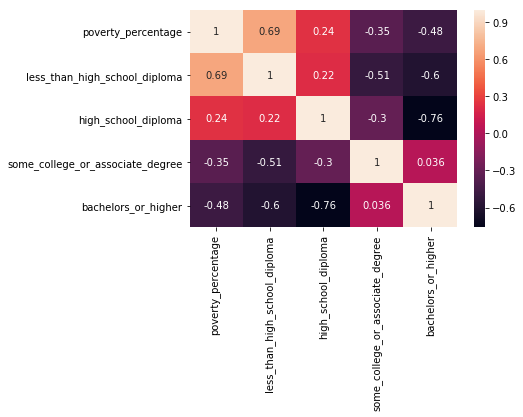

In [50]:
# The second plot shows more specificly the relationship between poverty and all four education levels
#sns.lmplot(x='education_percentage',y='poverty_percentage',hue='education_level',data=new_df2)
#plt.show()
plt.close()
correlation_df2=df_extended.iloc[:,[7,3,4,5,6]].corr()
sns.heatmap(correlation_df2,annot=True)
plt.show()

#### Conclusion 2-1: The effect of having some associate/college degree or bachelors/higher degree on reducing the poverty is close to each other

#### Conclusion 2-2: Having a high school diploma helps reducing the poverty

## Conclusion 2: Gaining high school diploma or some associate/college degree improves the poverty the most

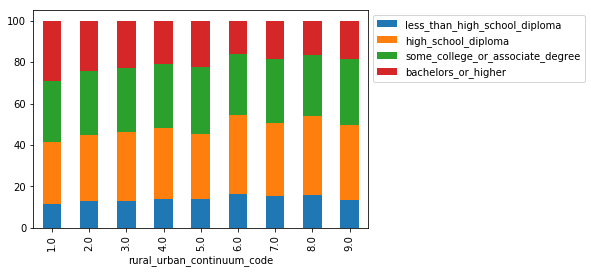

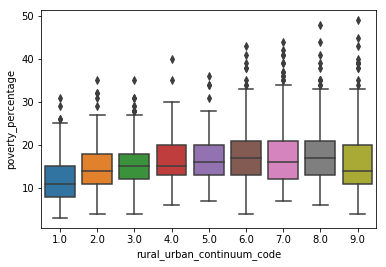

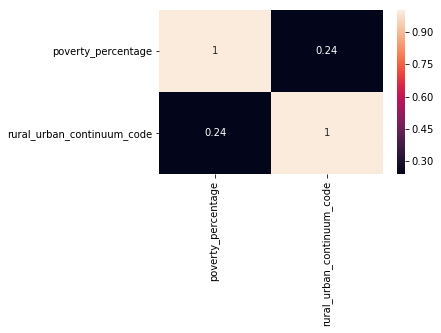

In [58]:
# Rural-urban-continuum-code and its relationship with poverty and education
new_df3 = df.groupby('rural_urban_continuum_code').mean()
new_df3.iloc[:,0:4].plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()
plt.close()
sns.boxplot(x='rural_urban_continuum_code',y='poverty_percentage',data=df)
plt.show()
plt.figure(figsize=[5,3])
correlation_df3=df_extended.iloc[:,[7,2]].corr()
sns.heatmap(correlation_df3,annot=True)
plt.show()

###### Two figures above show that except rural_urban_continuum_codes (RUCC) 1 and 9, the rest are close to each other in both education and poverty level. 
## Conclusion 3: RUCC has little effect on education and poverty

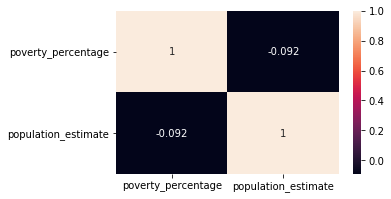

In [66]:
# Poverty and population
plt.close()
correlation_df3=df_extended.iloc[:,[7,8]].corr()
plt.figure(figsize=[5,3])
sns.heatmap(correlation_df3,annot=True)
plt.show()

## Conclusion 4: Population has little effect on poverty

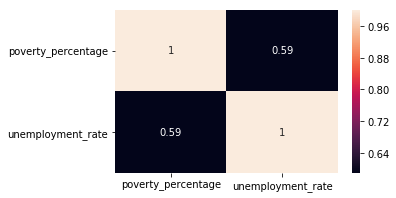

In [65]:
#Poverty and unemployment
plt.close()
correlation_df4=df_extended.iloc[:,[7,9]].corr()
plt.figure(figsize=[5,3])
sns.heatmap(correlation_df4,annot=True)
plt.show()

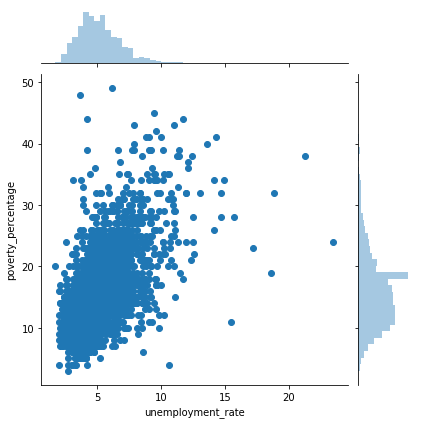

In [69]:
# it is helpful to take a look at the pair plot of population and poverty
plt.close()
sns.jointplot(x='unemployment_rate',y='poverty_percentage',data=df)
plt.show()

## Conclusion 5: Higher unemployment results in higher poverty rate

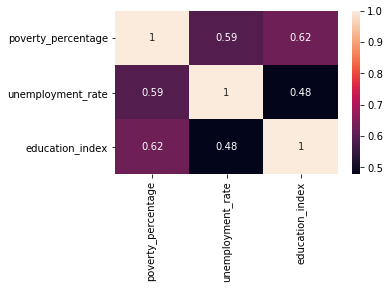

In [73]:
# At the end, I am investigating the correlation between education, unemployment, and poverty.
# In order to avoid dealing with four levels of education, I define an index called education index which varies between 0 and
# 100. Higher number means lower education: 0 means all adult population have bachelors degree or higher, and 100 means no adult
# population have high school diploma or higher
df_extended['education_index']=(3*df_extended.iloc[:,3]+2*df_extended.iloc[:,4]+df_extended.iloc[:,5])/3
correlation_df5=df_extended.iloc[:,[7,9,12]].corr()
plt.figure(figsize=[5,3])
sns.heatmap(correlation_df5,annot=True)
plt.show()

## Conclusion 6: There is string correlation between poverty, unemployment, and low education